# Classification Using Single Perceptron for Iris Flower Dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df['Type'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Here further we will be designing Perceptron for binary classification. Thus we will remove the data of 3rd Class from our data

unique_type = df['Type'].unique()
print(f'Printing Unique values of Type of Dataset {unique_type}')
df = df[df['Type'] != 2]
unique_type = df['Type'].unique()
print(f'Printing Unique values of Type of Dataset after removingthird category {unique_type}')

Printing Unique values of Type of Dataset [0 1 2]
Printing Unique values of Type of Dataset after removingthird category [0 1]


In [ ]:
x = df.drop(['Type'], axis=1)
y = df['Type']


In [ ]:
def perceptron(w, x, b):
    linear_output = np.dot(w,x) + b

    if linear_output > 0.0:
        activation = 1
    else:
        activation = 0

    return activation

In [ ]:
def prediction(w, x, b):
    predictions = np.array([])
    for x_i in x.values:
        predictions = np.append(predictions, perceptron(w, x_i, b))
    return predictions

In [ ]:
def perceptron_train(x, y , learning_rate = 0.01, epochs = 20):
    w = np.zeros(x.shape[1])
    print(f'Initialised w = {w.shape}')
    b = 0

    for e in range(6):
        for x_i, y_i in zip(x,y):
            y_hat = perceptron(w, x_i, b)
            w = w + learning_rate * (y_i - y_hat) *x_i
            b = b + learning_rate * (y_i - y_hat)
    return (w,b)

In [ ]:
# Training the perceptron
(w,b) = perceptron_train(x.values, y.values, learning_rate=0.01, epochs=20)
print(w)
print(b)

Initialised w = (4,)
[-0.011 -0.036  0.052  0.022]
-0.01


In [ ]:
w.reshape(4,)

array([-0.011, -0.036,  0.052,  0.022])

In [ ]:
# Predicting the values using perceptron
y_predicted = prediction(w, x, b)
y_predicted

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
!pip install seaborn.scatterplot

  Could not find a version that satisfies the requirement seaborn.scatterplot (from versions: )
No matching distribution found for seaborn.scatterplot


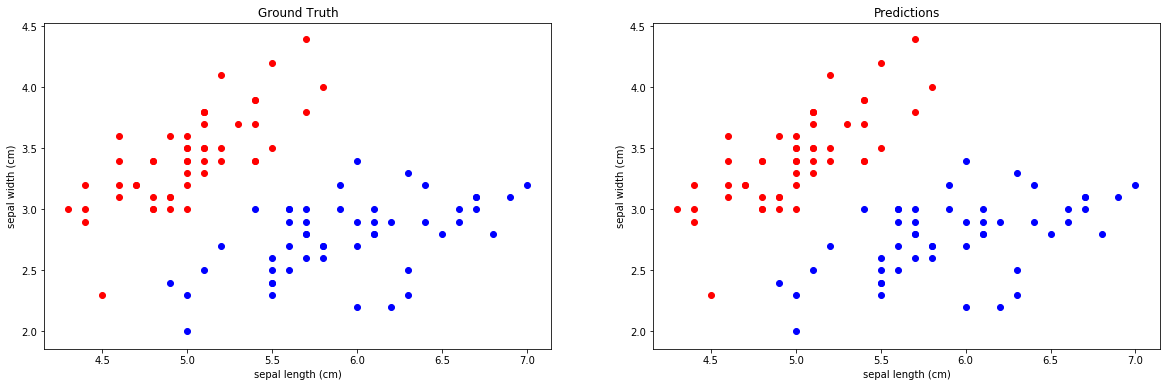

In [ ]:
# Plotting ground Truth
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.title('Ground Truth')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)') 

df_setosa = df[df['Type'] == 0]
df_x0_sepal_length = df_setosa['sepal length (cm)']
df_y0_sepal_width = df_setosa['sepal width (cm)']
plt.scatter(df_x0_sepal_length, df_y0_sepal_width, c='red')

df_versicolor = df[df['Type'] == 1]
df_x1_sepal_length = df_versicolor['sepal length (cm)']
df_y1_sepal_width = df_versicolor['sepal width (cm)']
plt.scatter(df_x1_sepal_length, df_y1_sepal_width, c='blue')



df['Predictions'] = y_predicted


plt.subplot(1,2,2)
plt.title('Predictions')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)') 


df_setosa_p = df[df['Predictions'] == 0]
df_x0_sepal_length_p = df_setosa_p['sepal length (cm)']
df_y0_sepal_width_p = df_setosa_p['sepal width (cm)']
plt.scatter(df_x0_sepal_length_p, df_y0_sepal_width_p, c='red')

df_versicolor_p = df[df['Predictions'] == 1]
df_x1_sepal_length_p = df_versicolor_p['sepal length (cm)']
df_y1_sepal_width_p = df_versicolor_p['sepal width (cm)']
plt.scatter(df_x1_sepal_length_p, df_y1_sepal_width_p, c='blue')

plt.show()